# importing required modules

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

np.set_printoptions(threshold=np.inf) #show all the array instead of only part of it

%matplotlib inline

# gathering data 

In [2]:
boston_data = load_boston()
dir(boston_data) #applicable methods for boston_data object

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [3]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
df = pd.DataFrame(data=boston_data.data,columns = boston_data.feature_names)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df['PRICE'] = boston_data.target

In [7]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


## visualizing house price distribution

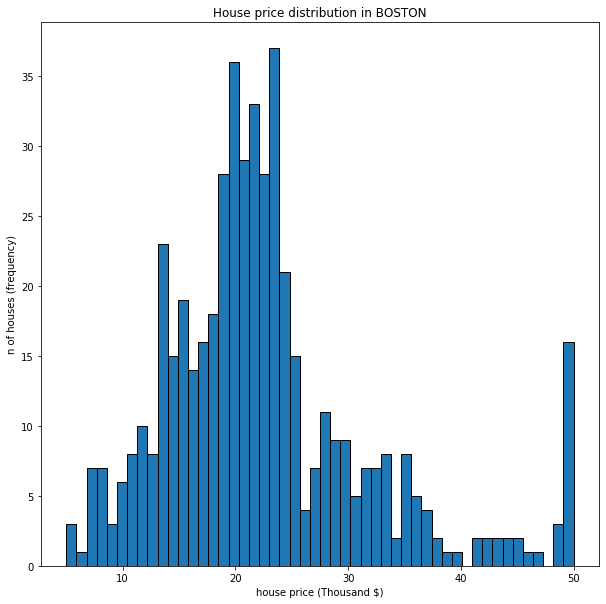

In [9]:
plt.figure(figsize=(10,10))
plt.hist(df['PRICE'],bins=50,ec='black')
plt.xlabel('house price (Thousand $)',)
plt.ylabel('n of houses (frequency)')
plt.title('House price distribution in BOSTON')
plt.show()

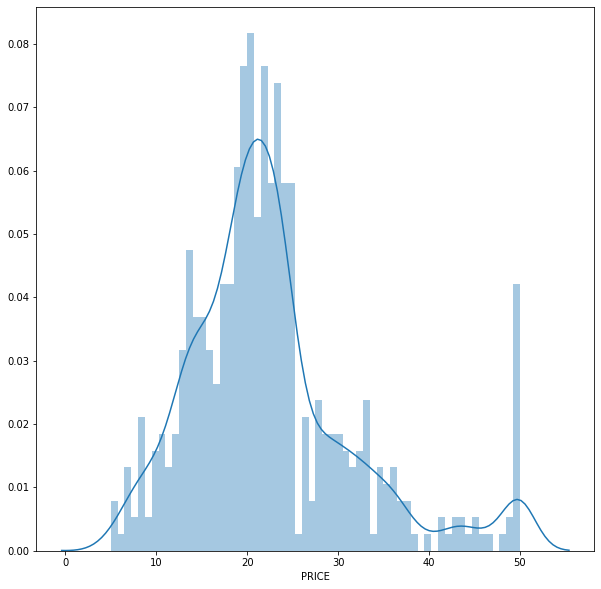

In [10]:
plt.figure(figsize=(10,10))
sns.distplot(df['PRICE'],bins=60) # the curve represent PDF "propability density function"
plt.show()

## visualizing number of rooms histogram

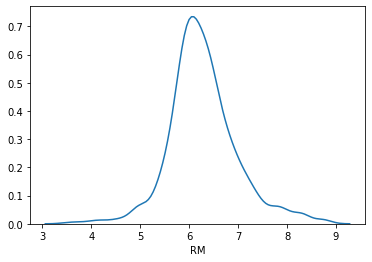

In [11]:
sns.distplot(df['RM'],bins=50,hist=False)
plt.show()

In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## plotting highway accessibility Index (RAD):

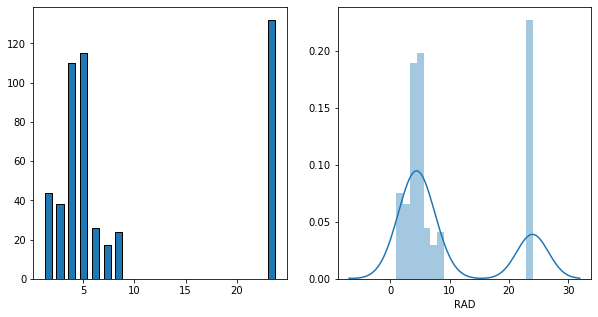

In [13]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.hist(df['RAD'],bins = 20,ec='black',rwidth = 0.6)
plt.subplot(1,2,2)
sns.distplot(df['RAD'],bins = 20)
plt.show()

In [14]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [15]:
mask = np.zeros_like(df.corr())
triangle = np.triu_indices_from(mask)
mask[triangle] = True
print(mask)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


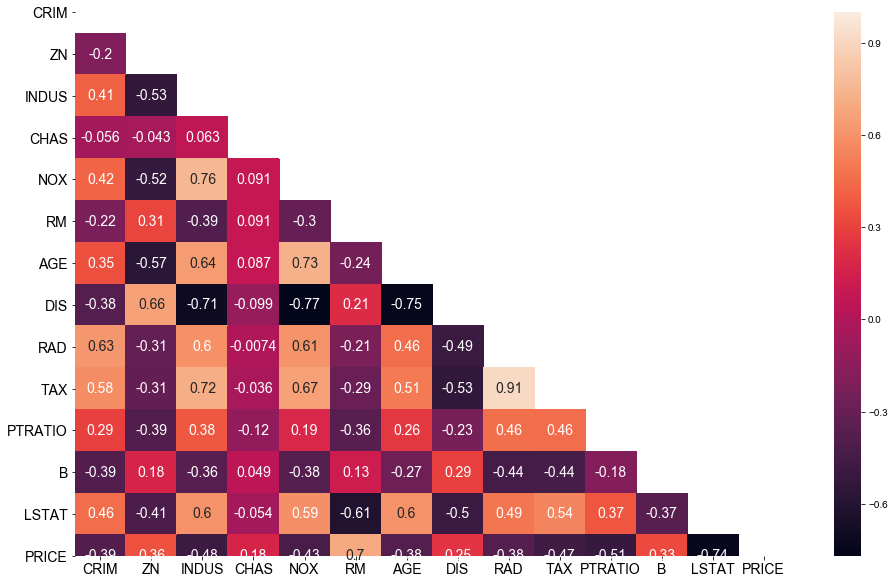

In [16]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## More visual details about correlations between features:
### NOX vs DIS

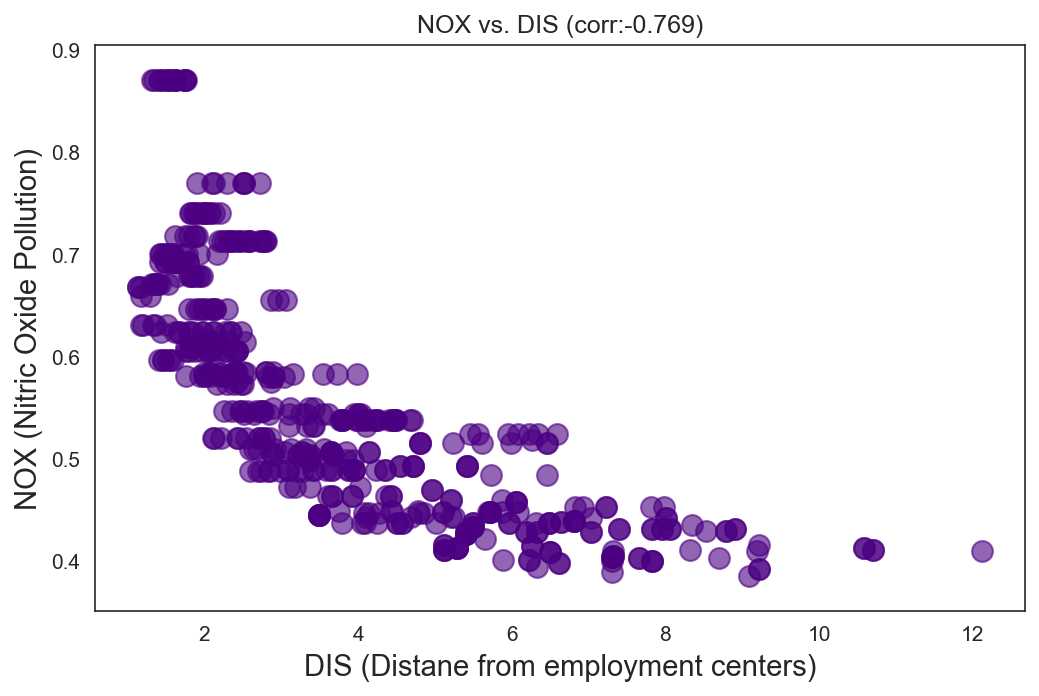

In [17]:
DIS_NOX_corr = round(df['NOX'].corr(df['DIS']),3)

plt.figure(figsize = (8,5),dpi=150)
plt.scatter(y = df['NOX'],x = df['DIS'],color = 'indigo',alpha = 0.6,s = 100)
plt.title(f'NOX vs. DIS (corr:{DIS_NOX_corr})')
plt.xlabel('DIS (Distane from employment centers)',fontsize=14)
plt.ylabel('NOX (Nitric Oxide Pollution)',fontsize = 14)
plt.show()

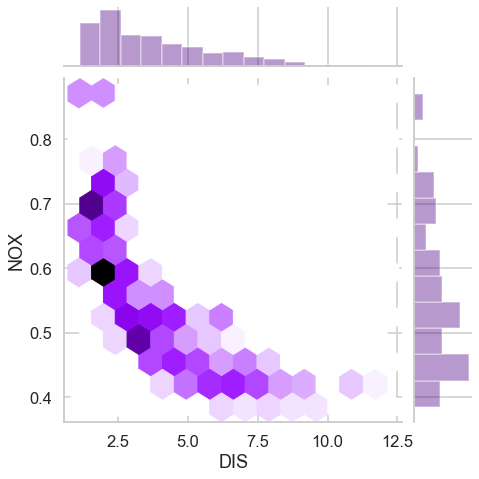

In [18]:
sns.set()
sns.set_style('whitegrid')
sns.set_context('talk')
sns.jointplot(x=df['DIS'],y=df['NOX'],color='indigo',kind='hex',height=7)
plt.show()

### TAX vs. RAD (corr = 0.91)

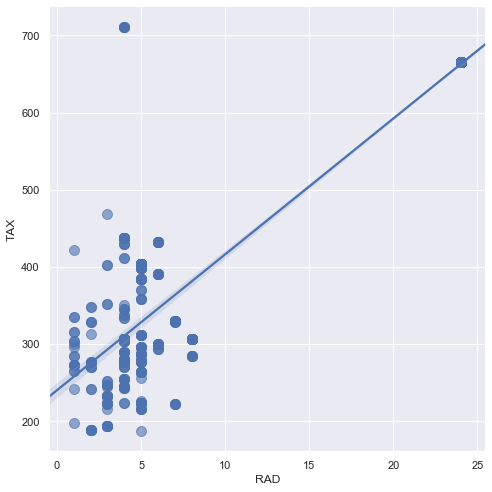

In [19]:
# as you can see the relation isn't strong as corr() indicates
sns.set()
sns.lmplot(x='RAD',y='TAX',data=df,height=7,scatter_kws={'s':100,'alpha':0.6})
plt.title(f'')
plt.show()

### RM vs. PRICE 

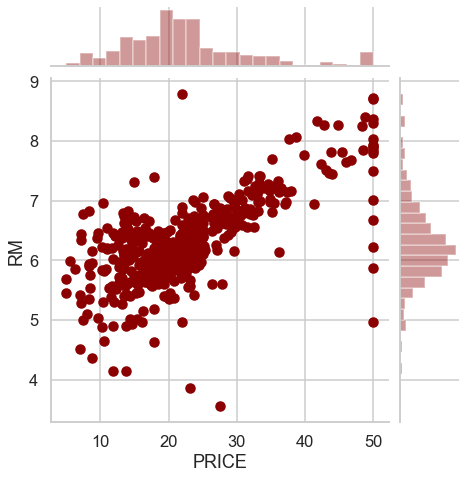

Wall time: 1.41 s


In [20]:
%%time
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=df['PRICE'],y=df['RM'],height=7,color='darkred')
plt.show()

In [21]:
#%%time 
#sns.pairplot(df,kind='reg',plot_kws={'line_kws':{'color':'red'}})

## Data split for training the model (Train&Test)

In [22]:
prices = df['PRICE']
features = df.drop(labels='PRICE',axis=1)

features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [23]:
X_train,X_test,y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state=10)

len(X_test)/len(features)

0.2015810276679842

## multivariable regression

In [24]:
regr = LinearRegression()
regr.fit(X_train,y_train)
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115628
Intercept 36.53305138282439


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


## Transforming data to obtain more accurate results

In [25]:
df['PRICE'].skew()

1.1080984082549072

In [26]:
log_price = np.log(df['PRICE'])
log_price.skew()

-0.33032129530987864

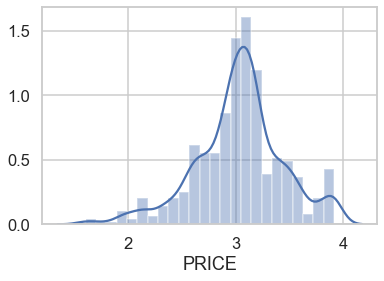

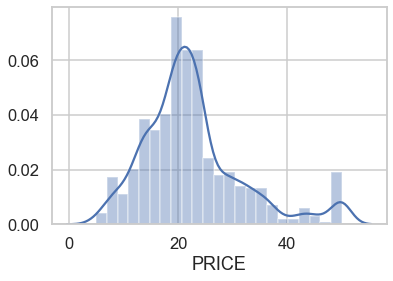

In [27]:
sns.distplot(log_price)
plt.show()
sns.distplot(prices)
plt.show()

## Regression using log prices

In [28]:
prices = np.log(df['PRICE'])
X_train,X_test,y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state=10)

regr = LinearRegression()
regr.fit(X_train,y_train)
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.7930234826697583
Test data r-squared: 0.7446922306260724
Intercept 4.05994387177519


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


## P-values and evaluating coefficients
P-values < 0.05 are statisticly sagnificant

In [29]:
X_incl_constant = sm.add_constant(X_train)

model = sm.OLS(y_train,X_incl_constant)
results = model.fit()
log_price_evaluation_df = pd.DataFrame({'coeff':results.params,'p-values':round(results.pvalues,3)})
log_price_evaluation_df

C:\Users\BAHGT GUROP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,coeff,p-values
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


## Testing for multicollinearity

In [30]:
X_incl_constant
variance_inflation_factor(X_incl_constant.values,1)
VIF = [variance_inflation_factor(X_incl_constant.values,i) for i in range(X_incl_constant.shape[1])]
pd.DataFrame({'coef name':X_incl_constant.columns,'VIF':VIF})

,coef name,VIF
0,const,597.548713
1,CRIM,1.714525
2,ZN,2.332822
3,INDUS,3.943449
4,CHAS,1.078813
5,NOX,4.410321
6,RM,1.840405
7,AGE,3.326766
8,DIS,4.222923
9,RAD,7.314300


## model simplification and BIC

In [31]:
#model 1 : log prices
X_incl_constant = sm.add_constant(X_train)

model = sm.OLS(y_train,X_incl_constant)
results = model.fit()
log_price_evaluation_df = pd.DataFrame({'coeff':results.params,'p-values':round(results.pvalues,3)})
print(f'BIC:{results.bic}')
print(f'rsqaured:{results.rsquared}')

BIC:-139.74997769478875
rsqaured:0.7930234826697582


In [32]:
X_incl_constant = sm.add_constant(X_train)
X_incl_constant = X_incl_constant.drop(['INDUS'],axis = 1)

model = sm.OLS(y_train,X_incl_constant)
results = model.fit()
log_price_minus_INDUS_evaluation_df = pd.DataFrame({'coeff':results.params,'p-values':round(results.pvalues,3)})
print(f'BIC:{results.bic}')
print(f'rsqaured:{results.rsquared}')

BIC:-145.14508855591163
rsqaured:0.7927126289415163


In [33]:
X_incl_constant = sm.add_constant(X_train)
X_incl_constant = X_incl_constant.drop(['INDUS','AGE'],axis = 1)

model = sm.OLS(y_train,X_incl_constant)
results = model.fit()
log_price_minus_INDUS_AGE_evaluation_df = pd.DataFrame({'coeff':results.params,'p-values':round(results.pvalues,3)})
print(f'BIC:{results.bic}')
print(f'rsqaured:{results.rsquared}')

BIC:-149.49934294224656
rsqaured:0.7918657661852815


In [34]:
frames = [log_price_evaluation_df,log_price_minus_INDUS_evaluation_df,log_price_minus_INDUS_AGE_evaluation_df]
pd.concat(frames,axis=1)

C:\Users\BAHGT GUROP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,coeff,p-values,coeff,p-values,coeff,p-values
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
B,0.000516,0.000,0.000511,0.000,0.000518,0.000
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
LSTAT,-0.031390,0.000,-0.031262,0.000,-0.030271,0.000
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
PTRATIO,-0.034795,0.000,-0.034126,0.000,-0.033481,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


## Residuals and Residual plot

In [35]:
#model with prices in 000$:

prices = df['PRICE']
features = df.drop(labels='PRICE',axis=1)
X_train,X_test,y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state=10)


model = sm.OLS(y_train,X_train)
results = model.fit()


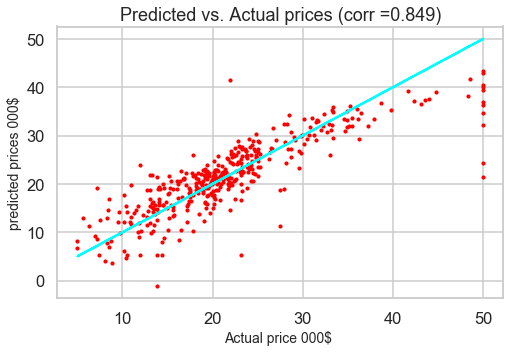

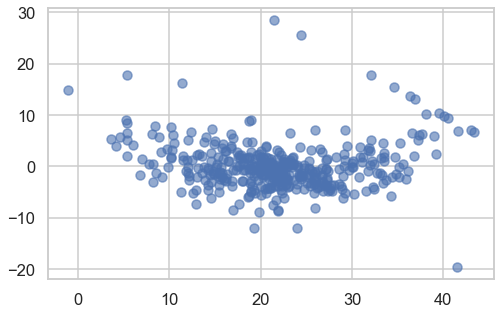

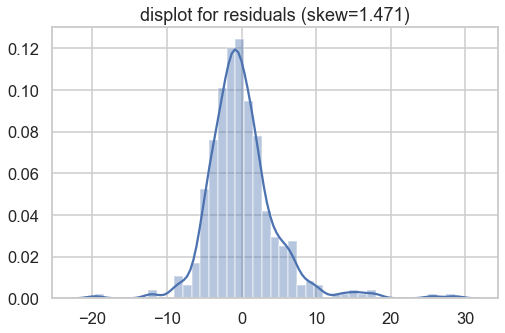

In [36]:
#plotting predicted prices vs the actual prices:
plt.figure(figsize=(8,5))
plt.scatter(x=y_train,y=results.fittedvalues,c='red',s=7)
plt.plot(y_train,y_train,c='cyan')
plt.xlabel('Actual price 000$ ',fontsize = 14)
plt.ylabel('predicted prices 000$',fontsize = 14)
plt.title(f'Predicted vs. Actual prices (corr ={round(y_train.corr(results.fittedvalues),3)})')
plt.show()

#plotting predicte prices vs. residual
plt.figure(figsize=(8,5))
plt.scatter(x=results.fittedvalues,y=results.resid,alpha=0.6)
plt.show()

#plotting residual distribution
plt.figure(figsize=(8,5))
sns.distplot(results.resid)
plt.title(f'displot for residuals (skew={round(results.resid.skew(),3)})')
plt.show()

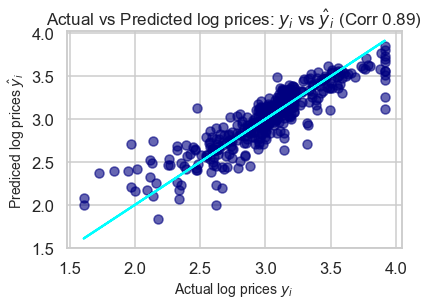

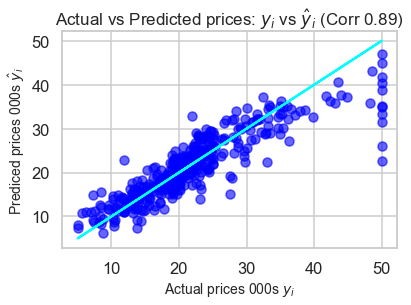

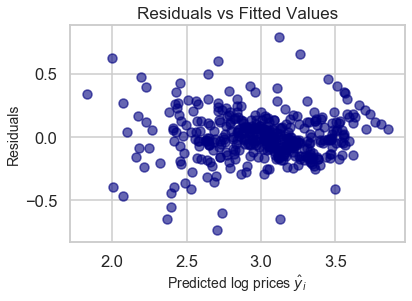

In [38]:
# Modified model: transformed (using log prices) & simplified (dropping two features)
prices = np.log(df['PRICE']) # Use log prices
features = df.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

# Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals
# residuals = y_train - results.fittedvalues
# results.resid

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Prediced log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='blue', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values

plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)

plt.xlabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)